In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

sys.path.append('..')
from Libraries.Utils.Global_Utils import *
from Libraries.ClusterMaster import *
from Libraries.DataFrameTypes import *
from Libraries.DataAnalysis import *
from xgboost import XGBClassifier

# Set-Up Phase

## Import titanic dataset

In [2]:
df = pd.read_csv("Datasets/titanic_train.csv")
display(df.shape)
df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df["Survived"] = df["Survived"].astype(bool)
df["Survived"].value_counts()

False    549
True     342
Name: Survived, dtype: int64

In [4]:
df["Survived"].value_counts().index.tolist()

[False, True]

In [5]:
df["Survived"].value_counts().values.tolist()

[549, 342]

## Remove Un-Wanted Columns

In [6]:
df.drop(columns=['Name',"Ticket"],
        inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,False,3,male,22.0,1,0,7.2500,NaN,S
1,2,True,1,female,38.0,1,0,71.2833,C85,C
2,3,True,3,female,26.0,0,0,7.9250,NaN,S
3,4,True,1,female,35.0,1,0,53.1000,C123,S
4,5,False,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
items = ['yes', 'no', 'idk']
testing = random.choices(items,
                         k=len(df))
df["like_dogs"] = testing
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,like_dogs
0,1,False,3,male,22.0,1,0,7.2500,NaN,S,no
1,2,True,1,female,38.0,1,0,71.2833,C85,C,no
2,3,True,3,female,26.0,0,0,7.9250,NaN,S,idk
3,4,True,1,female,35.0,1,0,53.1000,C123,S,no
4,5,False,3,male,35.0,0,0,8.0500,NaN,S,no


## Change cabin column to have the level on the ship

In [8]:
df["Cabin"] = df["Cabin"].str.replace(r'\d+', '').str[0]
df["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [9]:
df_features = DataFrameTypes(df,
                             target_col="Sex")

Categorical Features: {'Embarked', 'like_dogs', 'Cabin', 'Sex'}

Bool Features: {'Survived'}

Possible One hot encoded feature names: {'Embarked': ['Embarked_C', 'Embarked_S', 'Embarked_Q'], 'like_dogs': ['like_dogs_yes', 'like_dogs_no', 'like_dogs_idk'], 'Cabin': ['Cabin_G', 'Cabin_E', 'Cabin_D', 'Cabin_A', 'Cabin_C', 'Cabin_T', 'Cabin_F', 'Cabin_B'], 'Sex': ['Sex_male', 'Sex_female']}

------------------------------------------------------------------------------------------
Numerical Features: {'Fare', 'Pclass', 'SibSp', 'PassengerId', 'Parch', 'Age'}

Integer Features: {'Pclass', 'SibSp', 'PassengerId', 'Parch'}

Float Features: {'Fare', 'Age'}

Target Feature: Sex



PassengerId      int64
Survived          bool
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
like_dogs       object
dtype: object




Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


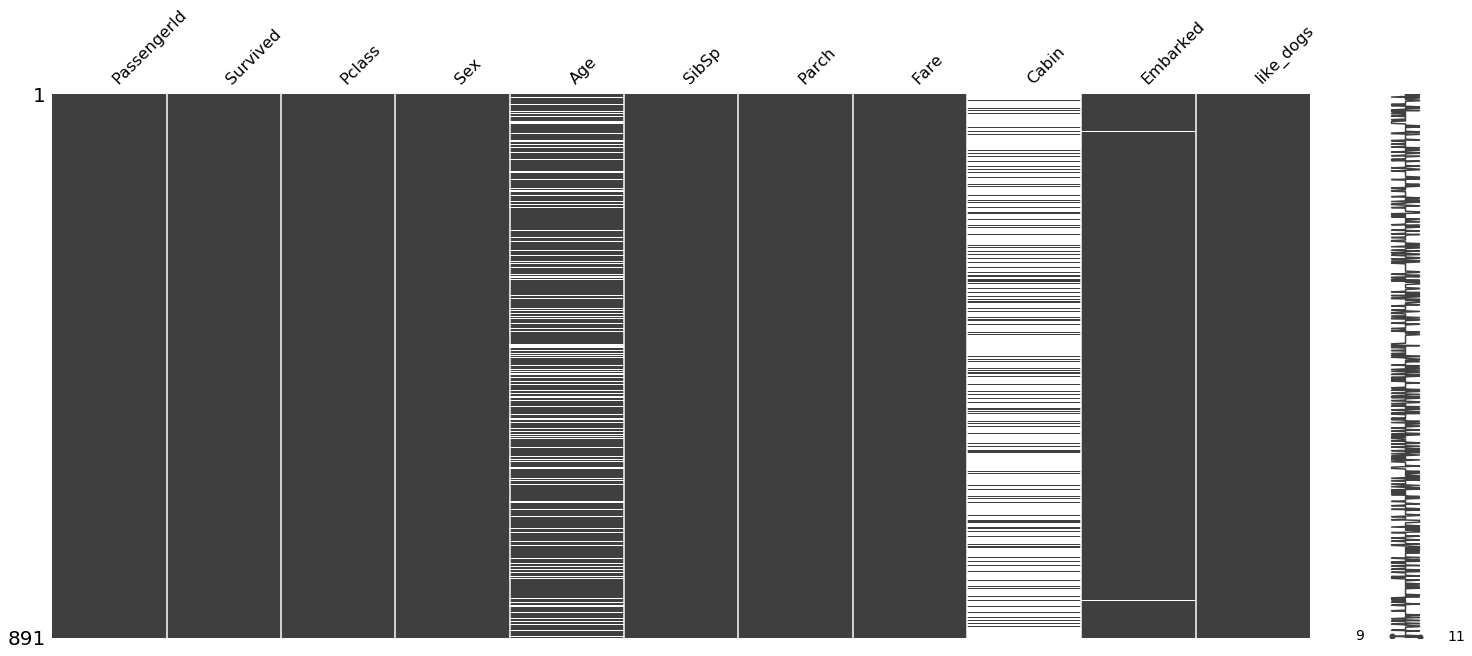

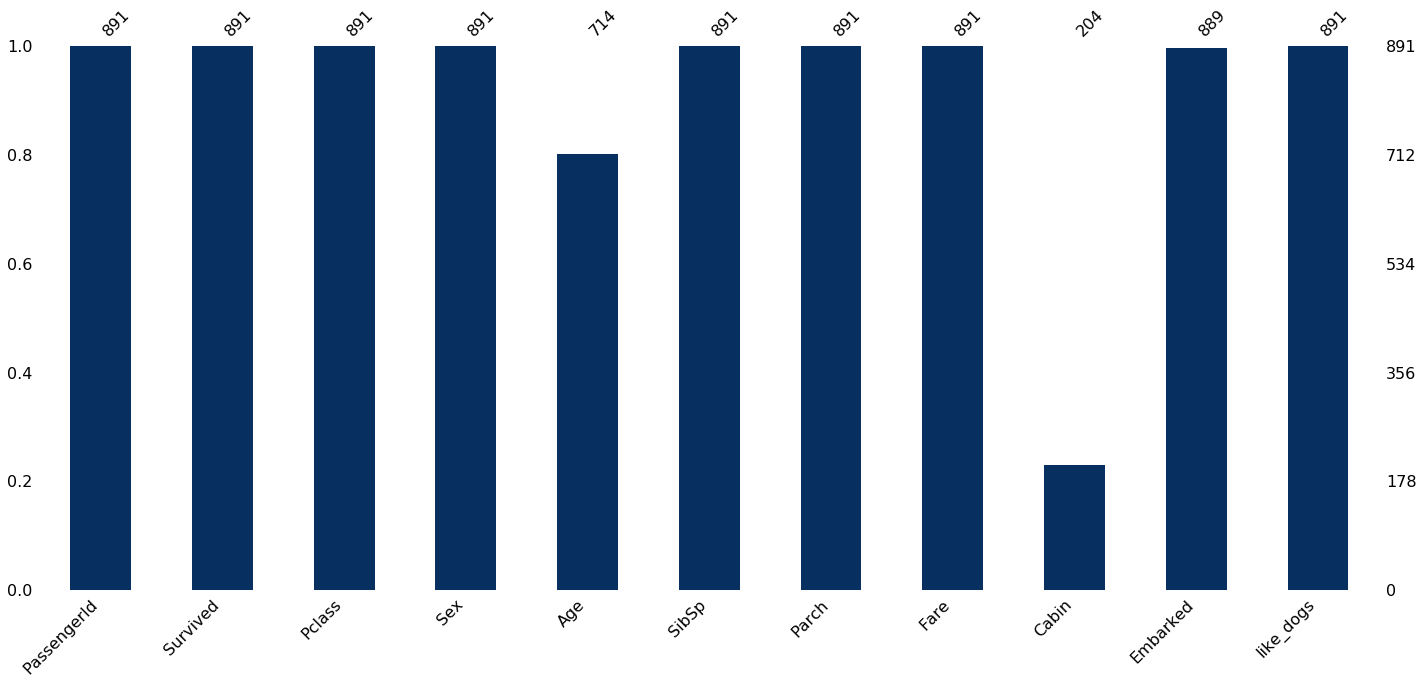

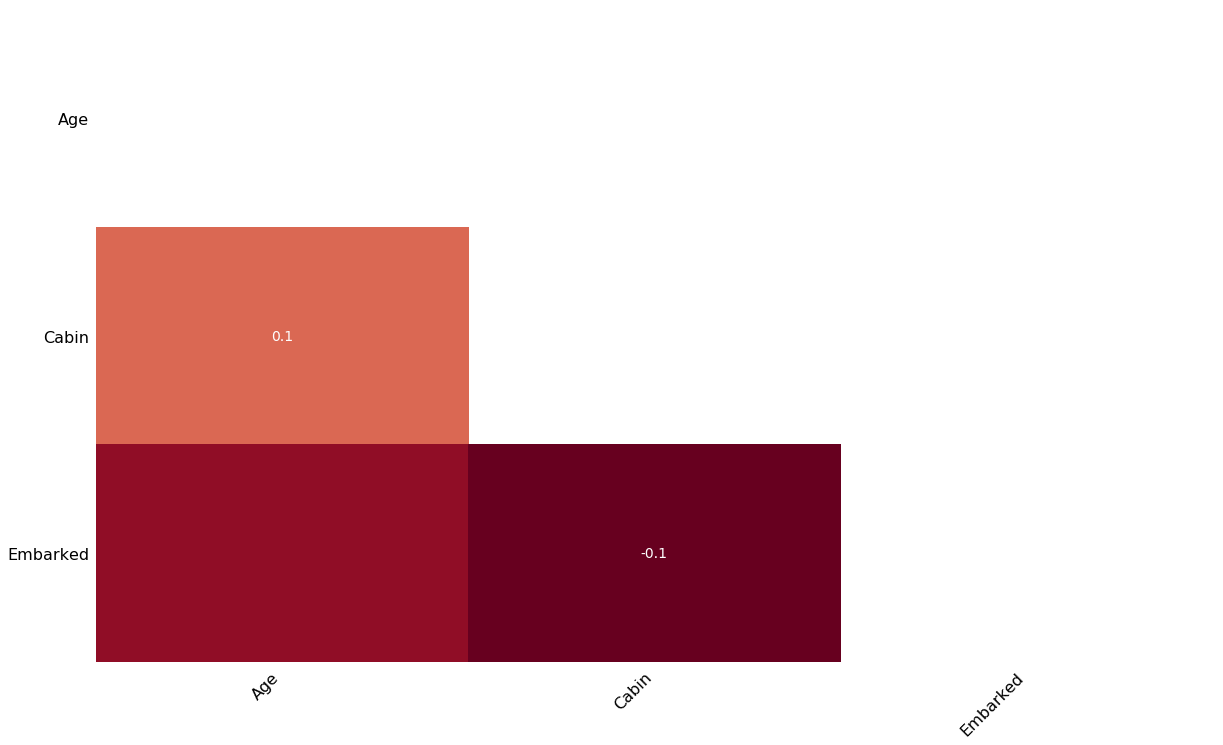

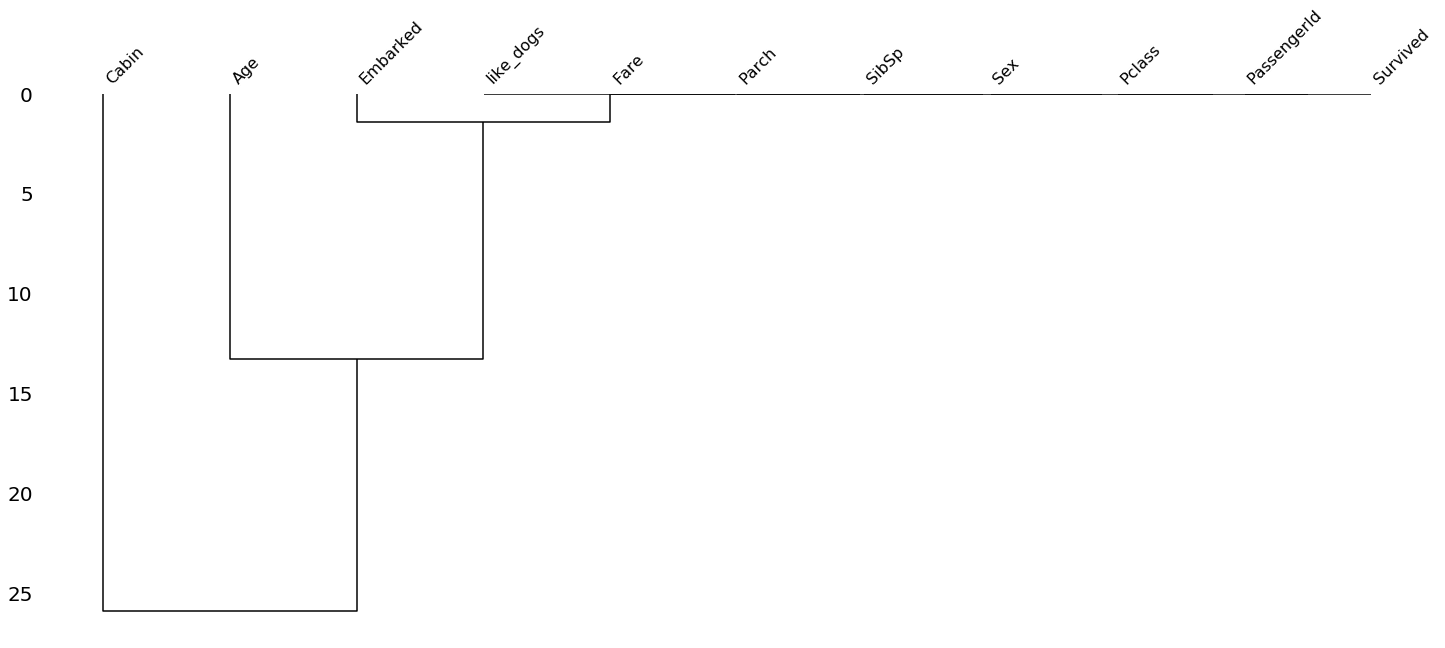

********************************************************************************




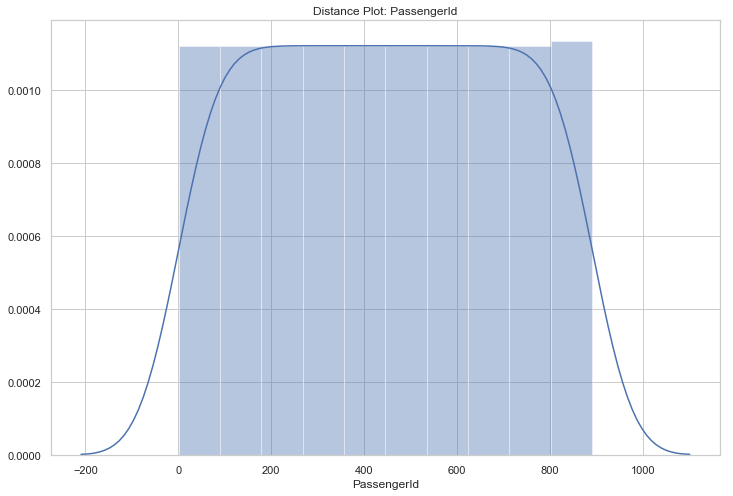

,PassengerId,var
count,891.000000,66231.0
mean,446.000000,66231.0
std,257.353842,66231.0
min,1.000000,66231.0
25%,223.500000,66231.0
50%,446.000000,66231.0
75%,668.500000,66231.0
max,891.000000,66231.0






--------------------------------------------------------------------------------




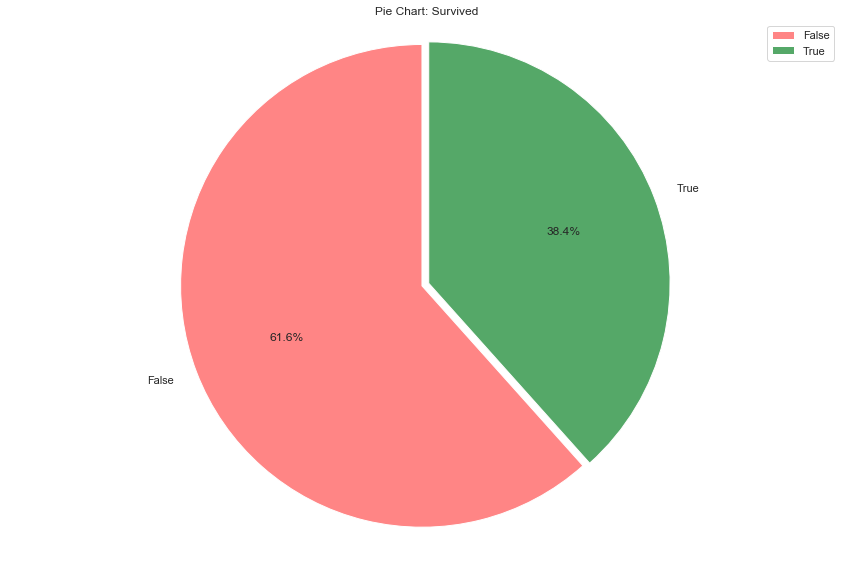

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,False,549
1,True,342






--------------------------------------------------------------------------------




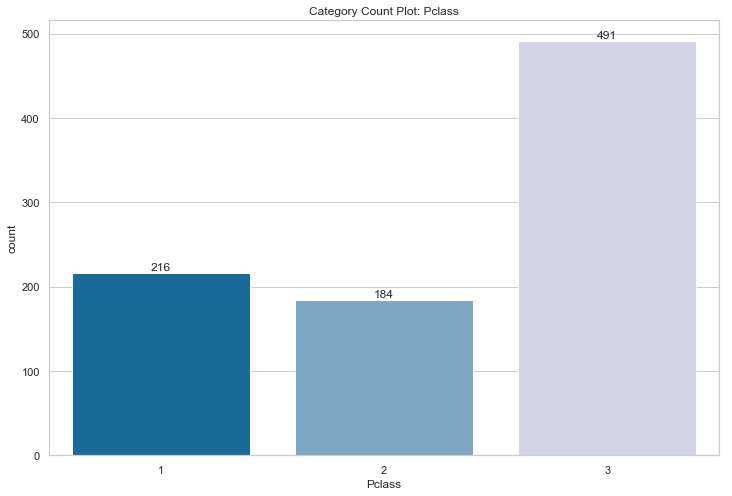

,Unique Values,Counts
0,3,491
1,1,216
2,2,184






--------------------------------------------------------------------------------




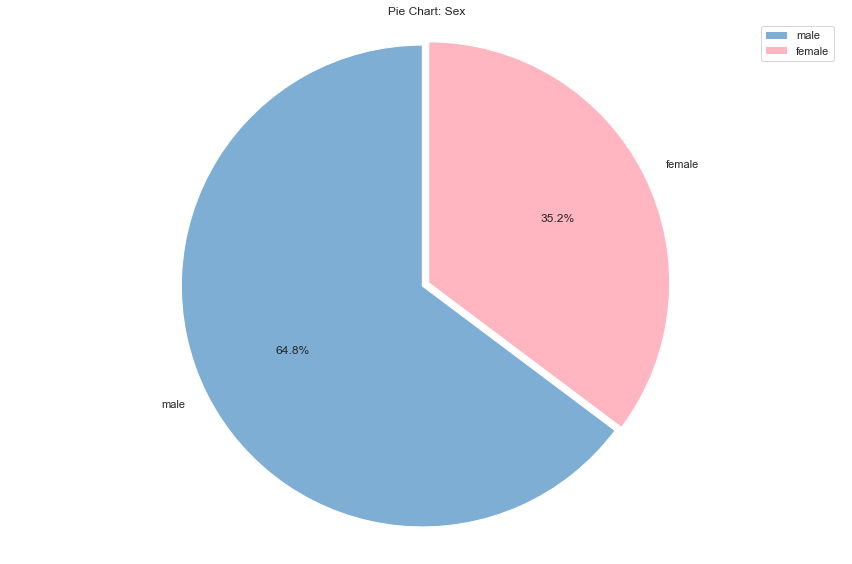

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,male,577
1,female,314






--------------------------------------------------------------------------------




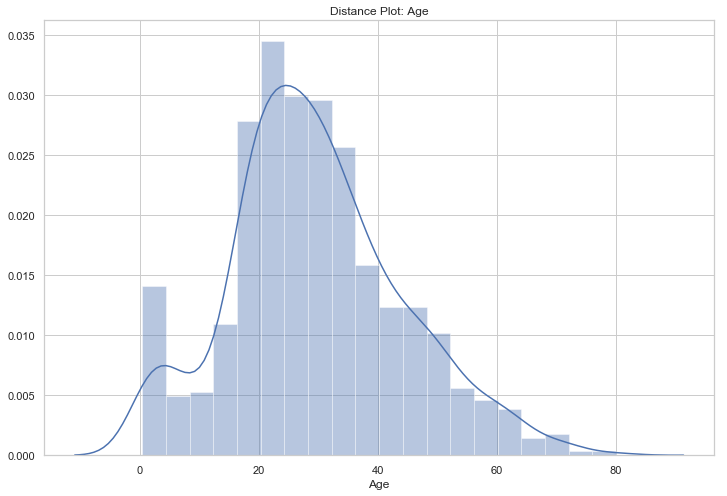

,Age,var
count,714.000000,211.019125
mean,29.699118,211.019125
std,14.526497,211.019125
min,0.420000,211.019125
25%,20.125000,211.019125
50%,28.000000,211.019125
75%,38.000000,211.019125
max,80.000000,211.019125






--------------------------------------------------------------------------------




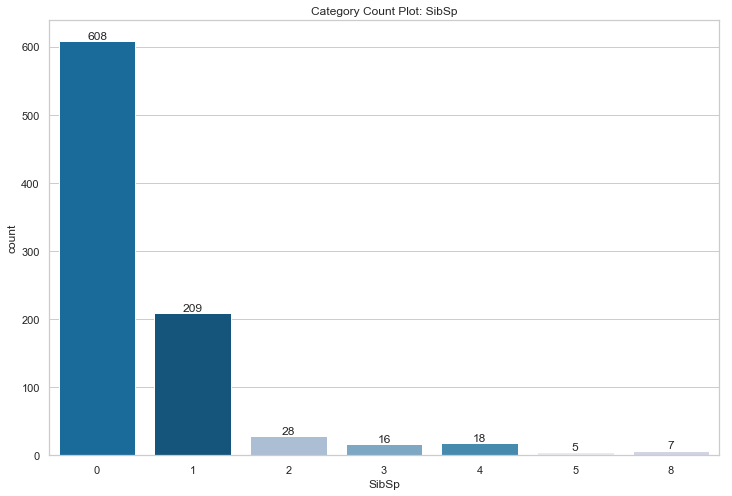

,Unique Values,Counts
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5






--------------------------------------------------------------------------------




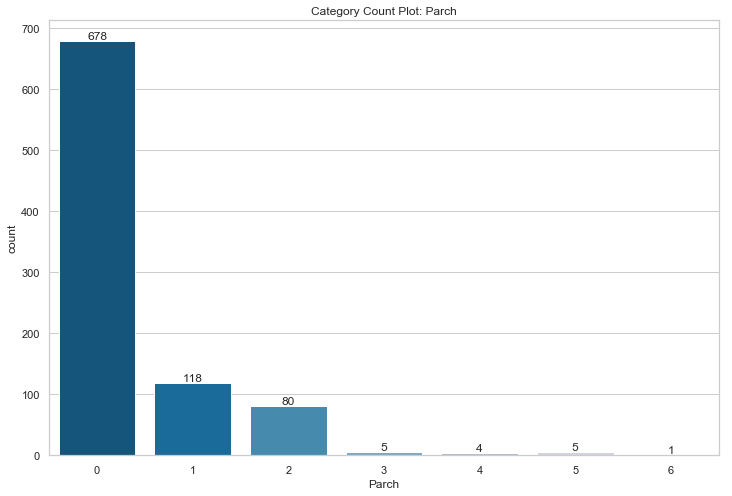

,Unique Values,Counts
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1






--------------------------------------------------------------------------------




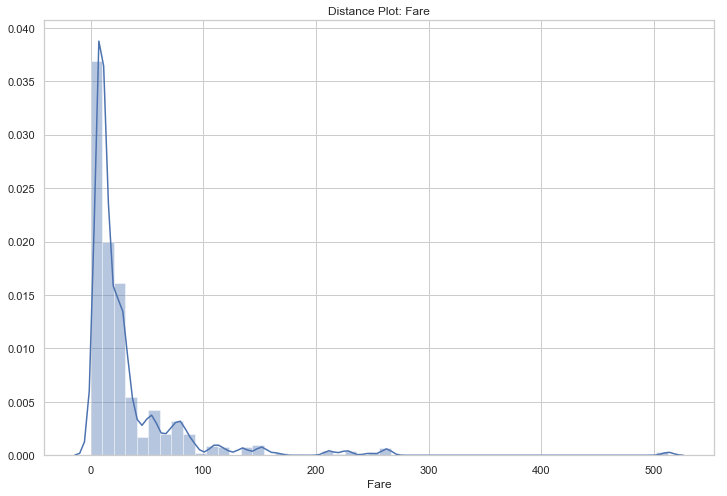

,Fare,var
count,891.000000,2469.436846
mean,32.204208,2469.436846
std,49.693429,2469.436846
min,0.000000,2469.436846
25%,7.910400,2469.436846
50%,14.454200,2469.436846
75%,31.000000,2469.436846
max,512.329200,2469.436846






--------------------------------------------------------------------------------




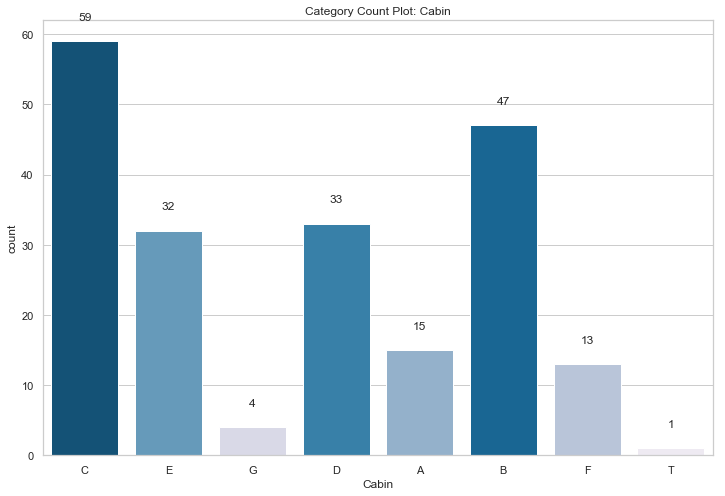

,Unique Values,Counts
0,C,59
1,B,47
2,D,33
3,E,32
4,A,15
5,F,13
6,G,4
7,T,1






--------------------------------------------------------------------------------




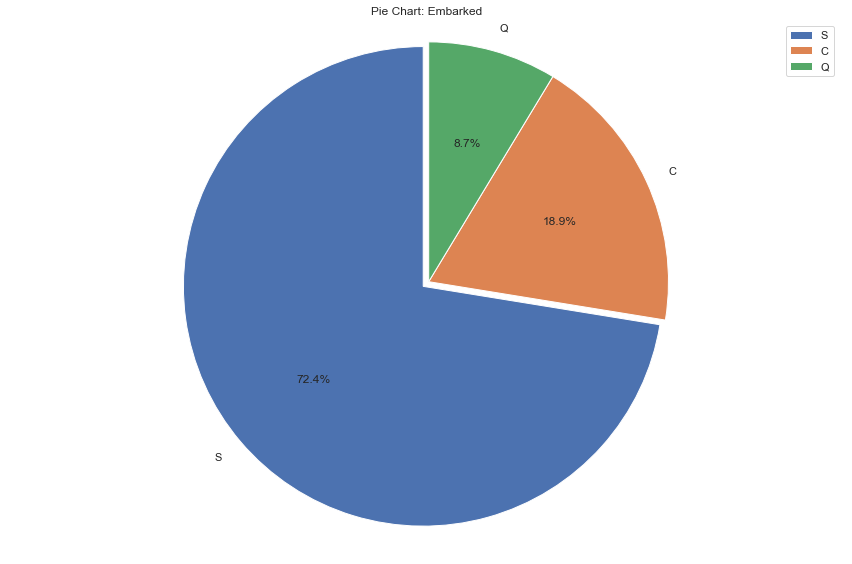

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,S,644
1,C,168
2,Q,77






--------------------------------------------------------------------------------




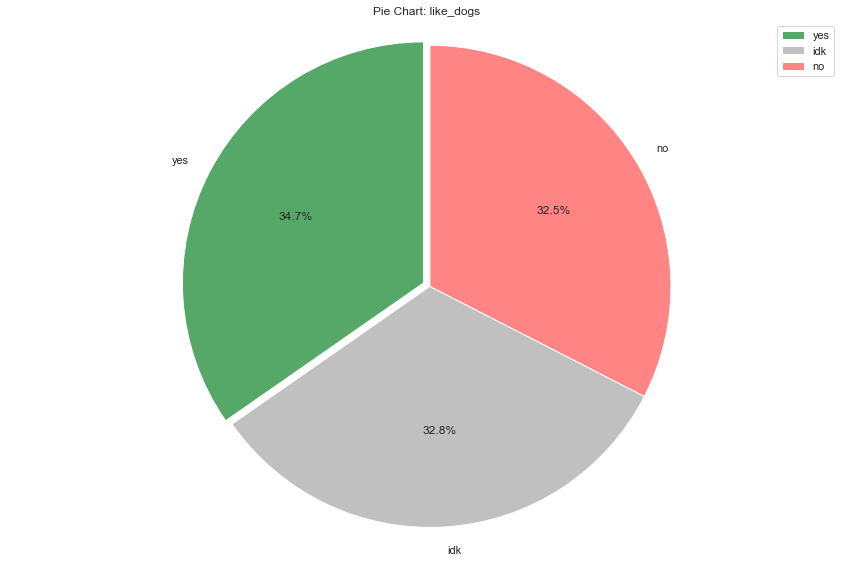

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,yes,309
1,idk,292
2,no,290






--------------------------------------------------------------------------------




In [10]:
analysis_obj = DataAnalysis(df,
                            df_features,
                            project_name="General Analysis")

In [11]:
str(True).upper

<function str.upper>

In [12]:
# vowels list
vowels = ['a', 'e', 'i', 'o', 'i', 'u']

# element 'e' is searched
index = vowels.index('a')
[x for x in range(0,5)]

[0, 1, 2, 3, 4]

In [13]:
DataCleaner()

NameError: name 'DataCleaner' is not defined

In [ ]:
df.drop(columns=["Cabin"],
        inplace=True)

In [ ]:
df_features = DataframeTypeHolder(df,
                                  target_col="Survived")

In [ ]:
df_features.get_all_features()

In [ ]:
%matplotlib notebook
%matplotlib inline

In [ ]:
df, le_map = encode_df(df,
                       df_features)
df.head()

In [ ]:
DataAnalysis(df)

In [ ]:
df[df_features.get_target()].value_counts()

In [ ]:
print_encoder_map(le_map)

In [ ]:
X = np.array(df.drop(df_features.get_target(),
                     axis=1,
                     inplace=False))
y = np.array(df[df_features.get_target()])

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    stratify=y)
X = None
y = None

In [ ]:
display(X_train.shape)
display(y_train.shape)
display(y_test.shape)
display(X_test.shape)

In [ ]:
params = {
    'objective':['binary:logistic'],
    'learning_rate':[.001,.01,.1,.15],
    'min_child_weight': [5,6,7,8,9,10],
    'gamma': [.15,.2,.1,.05,.01,.2,.25,.3],
    'subsample': [0.1,0.2,.05,.15,.02,.01],
    'colsample_bytree': [0.6,0.2,0.1,.05],
    'max_depth': [2,3,4,5,6,7],
    'n_estimators': [50,100,200,300,500,600,700],
}
best_xgb,xgb_best_parms = optimize_model_grid(
    model=XGBClassifier(),
    X_train=X_train,
    y_train=y_train,
    cv=5,
    param_grid=params,
    n_jobs=9,
)

In [ ]:

# Tuned Parameters: {'colsample_bytree': 0.6, 'gamma': 0.15, 'learning_rate': 0.001, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 50, 'objective': 'binary:logistic', 'subsample': 0.1}

In [ ]:
df_features.get_bool_features()

In [ ]:
df = pd.read_csv("Datasets/testing.csv")
display(df.shape)
df.head()

In [ ]:
df["broker_id"].value_counts()